In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string
import pickle

In [ ]:
np.random.seed(42)

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = api.load('word2vec-google-news-300')
wv.save('/content/drive/MyDrive/Text Classifier/wordvectors.kv')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
wv['anxious']

array([ 2.53906250e-01,  2.33398438e-01,  1.94091797e-02, -1.15234375e-01,
       -2.02148438e-01, -5.43212891e-03,  9.81445312e-02, -9.61914062e-02,
        1.29882812e-01, -2.55126953e-02, -1.05590820e-02,  7.17163086e-03,
        1.11328125e-01,  8.48388672e-03, -2.18750000e-01,  1.22558594e-01,
        1.11816406e-01,  3.41796875e-01,  1.72851562e-01,  8.78906250e-02,
       -2.69531250e-01,  1.15234375e-01,  3.58886719e-02,  7.91015625e-02,
        8.69140625e-02,  8.15429688e-02,  5.02929688e-02,  2.17285156e-02,
        2.59765625e-01, -4.17480469e-02,  2.03125000e-01,  3.57055664e-03,
        2.69775391e-02, -2.63671875e-01, -3.29589844e-02, -6.07910156e-02,
       -2.79541016e-02, -4.71191406e-02,  1.52343750e-01, -4.93164062e-02,
        7.32421875e-02, -3.45703125e-01,  1.53320312e-01, -1.61132812e-01,
       -1.11816406e-01,  7.38525391e-03, -2.32421875e-01,  2.65625000e-01,
       -9.57031250e-02, -1.85546875e-02, -5.17578125e-02,  1.31835938e-01,
       -9.47265625e-02,  

In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('/content/drive/MyDrive/Text Classifier/wordvectors.kv')

In [ ]:
wv.similarity("anxious","apple")

0.046270434

In [ ]:
wv.similarity("anxious","brave")

0.19716822

In [ ]:
wv.similarity("anxious","afraid")

0.5014468

In [ ]:
print(wv.most_similar(positive=['anxious'], topn=10))

[('eager', 0.7221144437789917), ('antsy', 0.6879408955574036), ('fearful', 0.6431165337562561), ('nervous', 0.6418450474739075), ('apprehensive', 0.6375094652175903), ('worried', 0.622000515460968), ('impatient', 0.6138771772384644), ('jittery', 0.613027036190033), ('uneasy', 0.6018393039703369), ('frustrated', 0.5848058462142944)]


In [ ]:
words = ["anxious","afraid", "hardworking", "conversation","studious","teammate","introvert","helping","partner","friend"]

In [ ]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.06686634,  1.046691  ],
       [-0.07953583,  0.7319887 ],
       [-0.6319869 ,  1.4795624 ],
       [ 0.43887666, -0.0825747 ],
       [-1.7675775 , -0.03040326],
       [ 1.2656819 , -1.8860447 ],
       [-2.2195225 , -1.458543  ],
       [ 0.8824959 ,  1.3074304 ],
       [ 1.4118204 , -0.16843617],
       [ 0.76661456, -0.93967146]], dtype=float32)

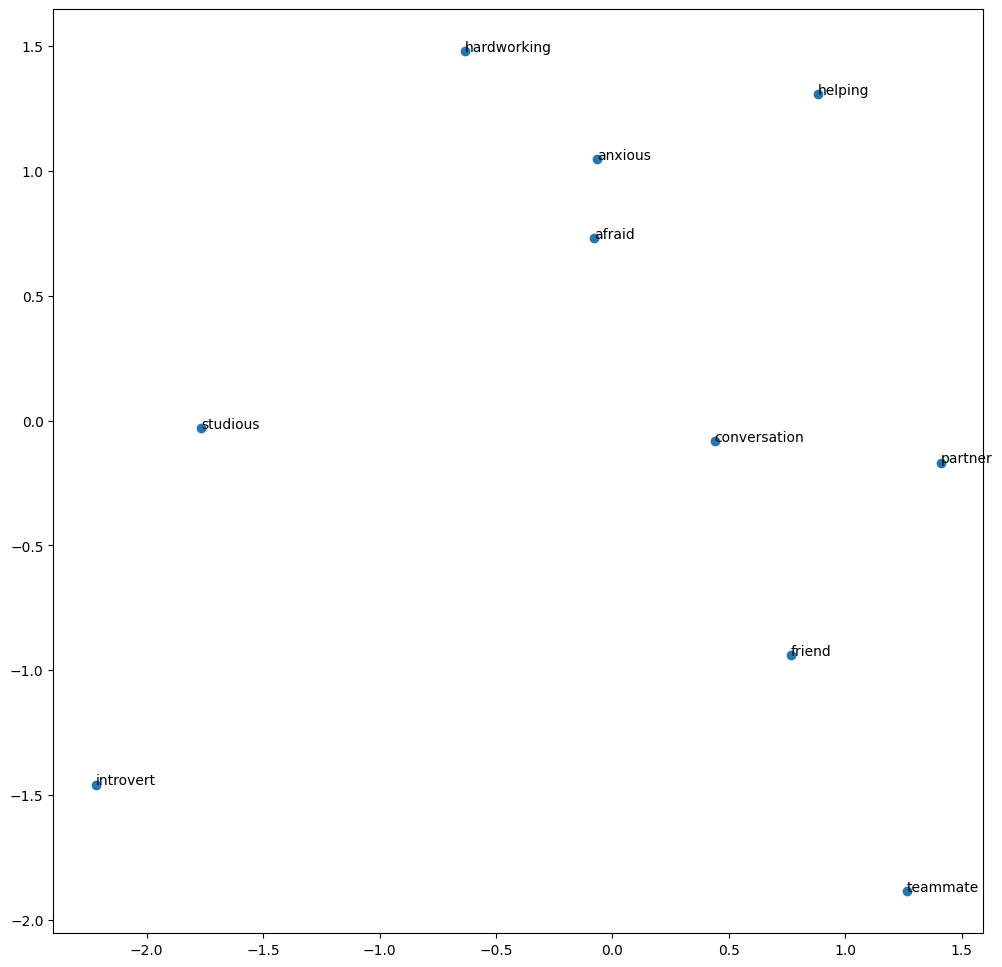

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Text Classifier/Persona Data.csv")
data.head()

,text,persona
0,I apologize if I’m rambling; I tend to do that...,neuroticism
1,I approach challenges with a proactive and sol...,conscientiousness
2,I’m afraid my nervousness is overshadowing my ...,neuroticism
3,I’m focused on maintaining a positive and supp...,agreeable
4,I’m enthusiastic about exploring different str...,openness to experience


In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)

    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:

def spacy_tokenizer(sentence):

    doc = nlp(sentence)




    mytokens = [ word.lemma_.lower().strip() for word in doc ]


    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]


    return mytokens

In [ ]:
sent_vec(" I sometimes get anxious about taking on new roles")

array([-1.75114558e-01,  8.51729955e-02, -6.02526542e-03,  1.34915865e-01,
       -1.55060597e-02,  1.54364170e-02, -7.47101613e-02, -2.16095753e-02,
       -3.77009465e-02,  2.43905874e-02, -6.03688558e-02, -5.36874624e-02,
       -1.98306353e-01,  2.56660657e-04, -9.21223958e-02,  9.76844201e-02,
        9.50415196e-02,  1.36330629e-01, -2.01419928e-02,  1.08122214e-02,
       -2.40084135e-01, -4.13239308e-03,  1.28009503e-01,  3.23020739e-02,
       -8.86105268e-02,  4.31330999e-02, -2.41004357e-01,  3.84928385e-02,
       -3.22171725e-02, -5.10003506e-02,  6.37856508e-03,  4.79165102e-02,
       -4.42051032e-02, -7.32359275e-02, -1.11994817e-01,  1.03610503e-01,
       -2.01690674e-01,  9.36404497e-02, -3.36195139e-02,  9.57031250e-02,
       -4.31894156e-02, -5.04807692e-02,  1.12329728e-01,  1.03510930e-01,
        5.25548397e-02, -2.72216797e-02, -4.90996532e-02, -1.58628806e-01,
       -8.91081981e-02,  6.61495893e-02, -1.29065880e-01,  2.07006210e-01,
       -2.02135917e-02,  

In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'amongst', 'among', 'just', 're', 'seemed', 'anything', 'yet', 'part', 'whether', 'latter', 'seem', 'has', 'amount', 'are', 'the', 'other', 'someone', 'above', 'me', 'might', 'somehow', 'was', 'into', 'others', 'mostly', 'whom', 'against', 'last', 'ours', 'most', 'third', 'made', 'doing', '‘ll', 'when', 'myself', 'below', 'very', 'moreover', 'whereafter', 'same', 'under', 'on', 'us', 'and', 'hundred', 'that', 'these', 'in', 'fifteen', 'three', '’ve', '‘ve', 'where', 'out', 'a', 'everything', 'am', "'d", 'be', 'sometime', 'fifty', 'along', 'yourself', 'cannot', 'an', 'whole', 'were', 'ourselves', 'their', 'this', 'whereupon', 'seems', 'neither', 'elsewhere', 'not', 'because', 'something', 'otherwise', 'or', 'much', 'yourselves', 'becomes', 'so', 'empty', 'whereby', 'ca', '‘m', 'everywhere', 'seeming', 'put', 'after', 'various', 'bottom', 'also', 'meanwhile', 'around', 'further', 'became', 'see', "'re", 'beyond', '’ll', '’re', 'many', 'if', 'do', 'your', 'afterwards', 'then', 'once', "'

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
data['tokens'] = data['text'].apply(spacy_tokenizer)

In [ ]:
data.head()

,text,persona,tokens
0,I apologize if I’m rambling; I tend to do that...,neuroticism,"[apologize, ramble, tend, anxious]"
1,I approach challenges with a proactive and sol...,conscientiousness,"[approach, challenge, proactive, solution, foc..."
2,I’m afraid my nervousness is overshadowing my ...,neuroticism,"[afraid, nervousness, overshadow, ability, con..."
3,I’m focused on maintaining a positive and supp...,agreeable,"[focus, maintain, positive, supportive, atmosp..."
4,I’m enthusiastic about exploring different str...,openness to experience,"[enthusiastic, explore, different, strategy, e..."


In [ ]:
data['vec'] = data['tokens'].apply(sent_vec)

In [ ]:
data.head(10)

,text,persona,tokens,vec
0,I apologize if I’m rambling; I tend to do that...,neuroticism,"[apologize, ramble, tend, anxious]","[0.10390625, 0.07119140625, -0.0095947265625, ..."
1,I approach challenges with a proactive and sol...,conscientiousness,"[approach, challenge, proactive, solution, foc...","[0.014665876116071428, 0.06991141183035714, -0..."
2,I’m afraid my nervousness is overshadowing my ...,neuroticism,"[afraid, nervousness, overshadow, ability, con...","[0.16463797433035715, 0.03156389508928571, 0.0..."
3,I’m focused on maintaining a positive and supp...,agreeable,"[focus, maintain, positive, supportive, atmosp...","[-0.04215349469866071, 0.0471649169921875, -0...."
4,I’m enthusiastic about exploring different str...,openness to experience,"[enthusiastic, explore, different, strategy, e...","[-0.038519965277777776, 0.064453125, 0.0245293..."
5,I’m open to embracing new trends and incorpora...,openness to experience,"[open, embrace, new, trend, incorporate, role,...","[-0.037862141927083336, 0.012803819444444444, ..."
6,Being part of a team that communicates openly ...,extraverted,"[team, communicate, openly, truly, enjoy]","[-0.03447087605794271, -0.0936279296875, -0.08..."
7,I’m afraid my nerves are making me seem less p...,neuroticism,"[afraid, nerve, prepared, role]","[0.1046875, 0.08720703125, 0.024267578125, -0...."
8,I am committed to staying organized and managi...,agreeable,"[committed, stay, organize, manage, time, effe...","[-0.042750767299107144, 0.07672991071428571, -..."
9,Ensuring that everyone feels like they are par...,extraverted,"[ensure, feel, like, team, important]","[-0.10139973958333333, 0.029673258463541668, -..."


In [ ]:
X = data['vec'].to_list()
y = data['persona'].to_list()

In [ ]:
X[0]

array([ 1.03906250e-01,  7.11914063e-02, -9.59472656e-03,  9.16015625e-02,
       -1.02343750e-01, -8.82934570e-02,  1.47241211e-01, -5.16189575e-02,
        9.79492187e-02, -1.42578125e-02, -7.09594727e-02,  1.23229980e-02,
        7.43896484e-02,  1.22204590e-01, -4.68750000e-02,  6.30859375e-02,
        6.41601563e-02,  3.00000000e-01,  1.13085937e-01, -1.25781250e-01,
        3.09570312e-02,  1.08593750e-01,  4.74853516e-02,  1.19873047e-01,
        1.01464844e-01, -3.83300781e-03, -4.82788086e-03,  1.19042969e-01,
        8.26171875e-02, -1.91406250e-02, -2.48291016e-02,  2.24224091e-02,
       -7.52685547e-02, -1.38574219e-01, -1.14501953e-02, -7.70507813e-02,
        1.28198242e-01, -7.98339844e-02,  7.72827148e-02,  2.93701172e-02,
        7.57812500e-02, -1.49951172e-01,  1.55664063e-01, -1.36425781e-01,
       -2.93823242e-02, -1.44836426e-02, -1.31671143e-01,  1.56250000e-02,
       -1.16650391e-01, -5.85937500e-02, -1.45996094e-02, -9.08203125e-03,
       -1.98730469e-02,  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
 from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.9


In [ ]:
answers = ["I sometimes get anxious about taking on new roles","i do consider myself a hard worker","I always try to help my team whenever possible", "i always participate in team building exercises","i love taking on new tasks all the time","i love making new friends all the time","i love my friends","sometimes a i get a bit of imposter syndrome, thinking i'm not good enough for certain tasks","I am very diligent in my studies","i am always looking for the opportunity to explore new work environments"]

neuroticism = 0
agreeable = 0
conscientiousness = 0
openness_to_experience = 0
extraverted = 0

df = pd.DataFrame({})
df['responses'] = pd.Series(answers)
df['tokens'] = df['responses'].apply(spacy_tokenizer)
df['vec'] = df['tokens'].apply(sent_vec)
X = df['vec'].to_list()
predicted = classifier.predict(X)
df['pred_persona'] = pd.Series(predicted)

for persona in df['pred_persona']:
  if persona == "neuroticism":
    neuroticism += 1
  elif persona == "agreeable":
    agreeable += 1
  elif persona == "conscientiousness":
    conscientiousness += 1
  elif persona == "openness to experience":
    openness_to_experience += 1
  elif persona == "extraverted":
    extraverted += 1

persona_array = np.array([neuroticism,agreeable,conscientiousness,openness_to_experience,extraverted])
print(persona_array)

[2 3 1 1 3]


In [ ]:
import pickle
pickle_out = open("vector_model-ver1.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [ ]:
from gensim.models import KeyedVectors
wvec = KeyedVectors.load("/content/drive/MyDrive/Text Classifier/wordvectors.kv", mmap='r')
wvec['anxious']

memmap([ 2.53906250e-01,  2.33398438e-01,  1.94091797e-02,
        -1.15234375e-01, -2.02148438e-01, -5.43212891e-03,
         9.81445312e-02, -9.61914062e-02,  1.29882812e-01,
        -2.55126953e-02, -1.05590820e-02,  7.17163086e-03,
         1.11328125e-01,  8.48388672e-03, -2.18750000e-01,
         1.22558594e-01,  1.11816406e-01,  3.41796875e-01,
         1.72851562e-01,  8.78906250e-02, -2.69531250e-01,
         1.15234375e-01,  3.58886719e-02,  7.91015625e-02,
         8.69140625e-02,  8.15429688e-02,  5.02929688e-02,
         2.17285156e-02,  2.59765625e-01, -4.17480469e-02,
         2.03125000e-01,  3.57055664e-03,  2.69775391e-02,
        -2.63671875e-01, -3.29589844e-02, -6.07910156e-02,
        -2.79541016e-02, -4.71191406e-02,  1.52343750e-01,
        -4.93164062e-02,  7.32421875e-02, -3.45703125e-01,
         1.53320312e-01, -1.61132812e-01, -1.11816406e-01,
         7.38525391e-03, -2.32421875e-01,  2.65625000e-01,
        -9.57031250e-02, -1.85546875e-02, -5.17578125e-0